# Assignment 3 – Association Rule Mining

### Instructions
In this assignment, you will explore Association Rule Mining using the Apriori and FP-Growth algorithms. Each task focuses on discovering item relationships, performance comparison, and practical interpretation.


## Task 1 – Apriori Algorithm
**Objective:** Identify strong association rules among purchased items.

### Steps
1. Download and load Groceries.csv dataset.
2. Transform to basket format.
3. Generate frequent itemsets (min_support=0.02).
4. Extract rules (min_confidence=0.3).
5. Visualize and interpret.

### Step 0: Download Dataset from Kaggle

First, we'll download the Groceries dataset using kagglehub. This requires Kaggle API credentials in `.env` file.

In [262]:
# Load environment variables and download dataset
import os
import shutil
from dotenv import load_dotenv
import kagglehub

# Load .env file
load_dotenv()

# Set Kaggle credentials from environment variables
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

# Create datasets folder in project root if it doesn't exist
project_root = os.getcwd()
datasets_dir = os.path.join(project_root, 'datasets')
os.makedirs(datasets_dir, exist_ok=True)

# Download Groceries dataset to cache first
print("Downloading Groceries dataset from Kaggle...")
cache_path = kagglehub.dataset_download("heeraldedhia/groceries-dataset")
print(f"✓ Dataset downloaded to cache: {cache_path}")

# List files in the downloaded directory to find the CSV file
print("\nFiles in datasets directory:")
files = os.listdir(cache_path)
for file in files:
    print(f"  - {file}")

# Find the Groceries CSV file specifically
# Look for files with "Groceries" in the name first (case-insensitive)
groceries_files = [f for f in files if 'Groceries' in f and f.endswith('.csv')]
csv_files = [f for f in files if f.endswith('.csv')]

if groceries_files:
    # Prefer files with "Groceries" in the name
    csv_filename = groceries_files[0]
    print(f"\n✓ Found Groceries CSV file: {csv_filename}")
elif csv_files:
    # Fallback to any CSV file if no Groceries-specific file found
    csv_filename = csv_files[0]
    print(f"\n✓ Found CSV file: {csv_filename}")
    print(" Note: File doesn't contain 'Groceries' in name, but proceeding anyway")
else:
    raise FileNotFoundError("No CSV file found in downloaded directory")
    
# Copy CSV file to datasets folder in project root as 'Groceries.csv'
source_path = os.path.join(cache_path, csv_filename)
dest_path = os.path.join(datasets_dir, 'Groceries.csv')

shutil.copy2(source_path, dest_path)
print(f"✓ Copied to project directory as 'Groceries.csv': {dest_path}")

# Set path to local datasets folder
path = datasets_dir

✓ Dataset downloaded to cache: /Users/harshwardhanpatil/.cache/kagglehub/datasets/heeraldedhia/groceries-dataset/versions/1

Files in datasets directory:
  - Groceries_dataset.csv

✓ Found Groceries CSV file: Groceries_dataset.csv
✓ Copied to project directory as 'Groceries.csv': /Users/harshwardhanpatil/Work/College Projects/Data Mining Assignment 3/datasets/Groceries.csv


## Task 1A: Load and Display Dataset (4 points)

**Objective:** Load the Groceries.csv dataset and display the first 10 transactions in a readable format.


In [263]:
# Task 1A: Load and display the dataset
import pandas as pd

# Load Groceries.csv from datasets folder
dataset_path = os.path.join('datasets', 'Groceries.csv')

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}. Please run Step 0 (download cell) first.")

df = pd.read_csv(dataset_path)
print(f"✓ Dataset loaded successfully!")
print(f"\nDataset Info:")
print(f"  - Total rows: {len(df):,}")
print(f"  - Columns: {list(df.columns)}")
print(f"  - Shape: {df.shape}")

# Display first 10 transactions in readable format
print("\n FIRST 10 TRANSACTIONS (Task 1A)")

print()

for idx, row in df.head(10).iterrows():
    print(f"Transaction {idx + 1}:")
    print(f"  {row.to_dict()}")
    print()

# Also display as a table
print("\n")
print("First 10 transactions (table format):")
df.head(10)


✓ Dataset loaded successfully!

Dataset Info:
  - Total rows: 38,765
  - Columns: ['Member_number', 'Date', 'itemDescription']
  - Shape: (38765, 3)

 FIRST 10 TRANSACTIONS (Task 1A)

Transaction 1:
  {'Member_number': 1808, 'Date': '21-07-2015', 'itemDescription': 'tropical fruit'}

Transaction 2:
  {'Member_number': 2552, 'Date': '05-01-2015', 'itemDescription': 'whole milk'}

Transaction 3:
  {'Member_number': 2300, 'Date': '19-09-2015', 'itemDescription': 'pip fruit'}

Transaction 4:
  {'Member_number': 1187, 'Date': '12-12-2015', 'itemDescription': 'other vegetables'}

Transaction 5:
  {'Member_number': 3037, 'Date': '01-02-2015', 'itemDescription': 'whole milk'}

Transaction 6:
  {'Member_number': 4941, 'Date': '14-02-2015', 'itemDescription': 'rolls/buns'}

Transaction 7:
  {'Member_number': 4501, 'Date': '08-05-2015', 'itemDescription': 'other vegetables'}

Transaction 8:
  {'Member_number': 3803, 'Date': '23-12-2015', 'itemDescription': 'pot plants'}

Transaction 9:
  {'Member

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


## Task 1B: Exploratory Data Analysis (5 points)

**Objective:** Perform basic EDA:
- Display top 15 most frequent items (bar plot)
- Check average number of items per transaction
- Visualize item frequency distribution


TASK 1B: EXPLORATORY DATA ANALYSIS

1. Top 15 Most Frequent Items:
itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
pastry               785
pip fruit            744
shopping bags        731
canned beer          717
bottled beer         687
Name: count, dtype: int64


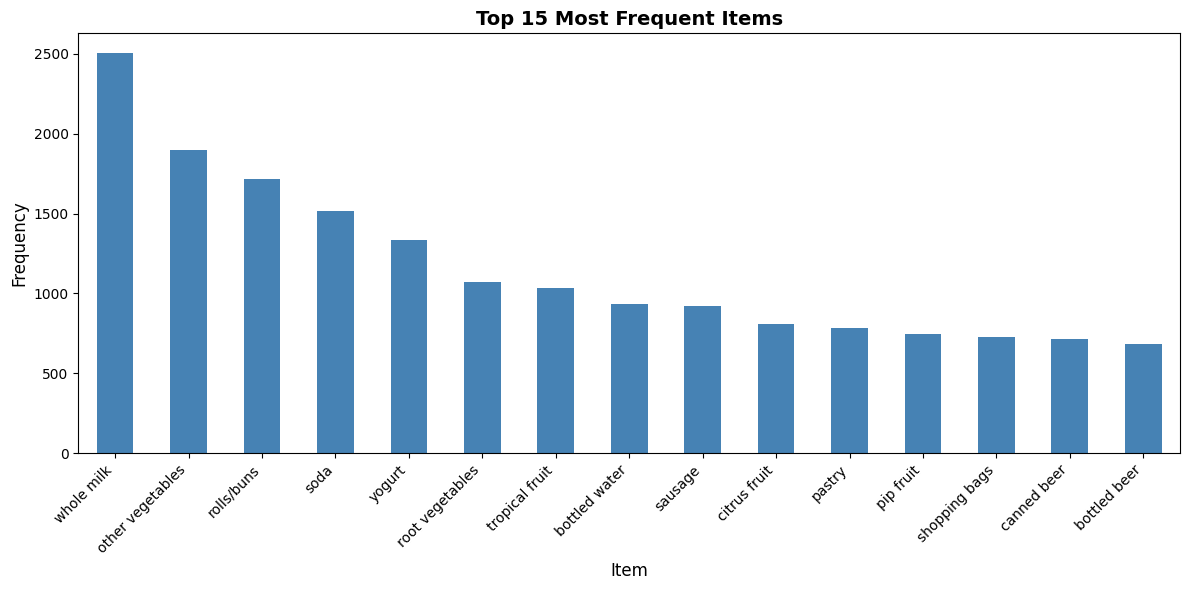


2. Average number of items per transaction: 9.94
   - Min items in a transaction: 2
   - Max items in a transaction: 36
   - Median items per transaction: 9.00


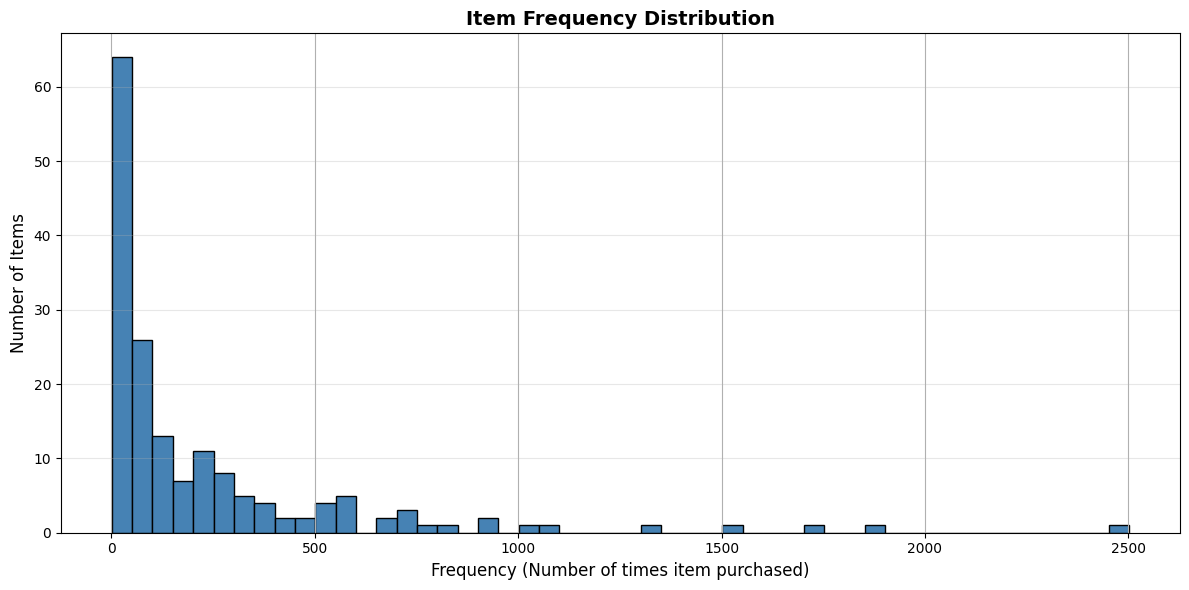


Dataset Summary:
  - Total transactions: 3,898
  - Total unique items: 167
  - Total item purchases: 38,765


In [264]:
# Task 1B: Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns


print("TASK 1B: EXPLORATORY DATA ANALYSIS")


# 1. Count frequency of each item
item_counts = df['itemDescription'].value_counts()

print("\n1. Top 15 Most Frequent Items:")
top_15 = item_counts.head(15)
print(top_15)

# Create bar plot of top 15 most frequent items
plt.figure(figsize=(12, 6))
top_15.plot(kind='bar', color='steelblue')
plt.title('Top 15 Most Frequent Items', fontsize=14, fontweight='bold')
plt.xlabel('Item', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Calculate average number of items per transaction
items_per_transaction = df.groupby('Member_number').size()
avg_items = items_per_transaction.mean()
print(f"\n2. Average number of items per transaction: {avg_items:.2f}")
print(f"   - Min items in a transaction: {items_per_transaction.min()}")
print(f"   - Max items in a transaction: {items_per_transaction.max()}")
print(f"   - Median items per transaction: {items_per_transaction.median():.2f}")

# 3. Visualize item frequency distribution
plt.figure(figsize=(12, 6))
item_counts.hist(bins=50, color='steelblue', edgecolor='black')
plt.title('Item Frequency Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Frequency (Number of times item purchased)', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nDataset Summary:")
print(f"  - Total transactions: {df['Member_number'].nunique():,}")
print(f"  - Total unique items: {df['itemDescription'].nunique():,}")
print(f"  - Total item purchases: {len(df):,}")


## Interpretations after EDA: 
### Chart 1. Top 15 Most Frequent Items (Bar Chart)

Interpretation:

Staple items dominate: whole milk (~2500) leads, followed by other vegetables and rolls/buns. Produce appears multiple times, indicating strong demand for fresh items.

Beverages and convenience items are prominent: soda, bottled water, and beer are in the top 15, along with yogurt and sausage. Shopping bags (~700) suggest most customers purchase bags at checkout.

### Chart 2. Item Frequency Distribution (Histogram)

Interpretation:

Long-tail distribution: most items are purchased infrequently (~60–65 items in the 0–50 range), while a small number of popular items have very high frequencies (up to ~2500).

This pattern supports association rule mining: strong patterns are more likely among the frequently purchased items, while the long tail includes many rarely bought items that may not form strong associations.

## Task 1C: Convert to Transactional Binary Form (6 points)

**Objective:** Convert the dataset into proper transactional form suitable for Apriori:
- Binary encoding: 1 if item present, 0 otherwise
- Confirm shape and column count


In [265]:
# Task 1C: Convert to transactional binary form

print("TASK 1C: TRANSFORM TO BINARY MATRIX")


# Transform to basket format (binary matrix)
basket = pd.crosstab(df['Member_number'], df['itemDescription'])
basket = basket.map(lambda x: 1 if x > 0 else 0)

print(f"\n✓ Basket (binary matrix) created successfully!")
print(f"\nShape and Column Count:")
print(f"  - Shape: {basket.shape}")
print(f"  - Rows (transactions): {basket.shape[0]:,}")
print(f"  - Columns (items): {basket.shape[1]:,}")

print(f"\n✓ Binary encoding confirmed:")
print(f"  - Values are binary (0 or 1): {set(basket.values.flatten()) == {0, 1}}")
print(f"  - Total items purchased: {basket.sum().sum():,}")
print(f"  - Average items per transaction: {basket.sum(axis=1).mean():.2f}")

print(f"\nSample of basket matrix (first 5 rows, first 10 columns):")
basket.iloc[:5, :10]


TASK 1C: TRANSFORM TO BINARY MATRIX

✓ Basket (binary matrix) created successfully!

Shape and Column Count:
  - Shape: (3898, 167)
  - Rows (transactions): 3,898
  - Columns (items): 167

✓ Binary encoding confirmed:
  - Values are binary (0 or 1): True
  - Total items purchased: 34,766
  - Average items per transaction: 8.92

Sample of basket matrix (first 5 rows, first 10 columns):


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries
Member_number,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,1,0
1002,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0


## Task 1D: Apply Apriori Algorithm (8 points)

**Objective:** Apply the Apriori algorithm with `min_support=0.02`:
- Display top 10 frequent itemsets (by support)
- Show time taken for computation


In [266]:
# Task 1D: Apply Apriori algorithm
import time
from mlxtend.frequent_patterns import apriori

print("TASK 1D: APRIORI ALGORITHM")


print("\nApplying Apriori algorithm with min_support=0.02...")

start_time = time.time()
frequent_itemsets_ap = apriori(basket, min_support=0.02, use_colnames=True)
computation_time = time.time() - start_time

print(f"\n✓ Apriori algorithm completed!")
print(f"  - Computation time: {computation_time:.2f} seconds")
print(f"  - Frequent itemsets found: {len(frequent_itemsets_ap)}")

if len(frequent_itemsets_ap) > 0:
    frequent_itemsets_sorted = frequent_itemsets_ap.sort_values('support', ascending=False)
    
    print(f"\nTop 10 Frequent Itemsets (by support):")

    print(frequent_itemsets_sorted.head(10).to_string())
    
    frequent_itemsets_sorted['itemset_size'] = frequent_itemsets_sorted['itemsets'].apply(lambda x: len(x))
    print(f"\nFrequent itemsets by size:")
    print(frequent_itemsets_sorted['itemset_size'].value_counts().sort_index())
else:
    print("\n No frequent itemsets found with min_support=0.02")

TASK 1D: APRIORI ALGORITHM

Applying Apriori algorithm with min_support=0.02...

✓ Apriori algorithm completed!
  - Computation time: 0.45 seconds
  - Frequent itemsets found: 894

Top 10 Frequent Itemsets (by support):
      support                        itemsets
85   0.458184                    (whole milk)
52   0.376603              (other vegetables)
64   0.349666                    (rolls/buns)
73   0.313494                          (soda)
86   0.282966                        (yogurt)
79   0.233710                (tropical fruit)
65   0.230631               (root vegetables)
6    0.213699                 (bottled water)
68   0.206003                       (sausage)
485  0.191380  (whole milk, other vegetables)

Frequent itemsets by size:
itemset_size
1     87
2    499
3    290
4     18
Name: count, dtype: int64


## Task 1E: Generate Association Rules (6 points)

**Objective:** Generate association rules using metrics:
- `metric='lift'`, `min_threshold=1.0`
- Display top 10 strongest rules sorted by lift
- Show columns: {antecedents, consequents, support, confidence, lift}


In [267]:
# Task 1E: Generate association rules
from mlxtend.frequent_patterns import association_rules


print("TASK 1E: GENERATE ASSOCIATION RULES")


if len(frequent_itemsets_ap) > 0:
    print("\nGenerating association rules with metric='lift', min_threshold=1.0...")
    rules_ap = association_rules(frequent_itemsets_ap, metric='lift', min_threshold=1.0)
    
    print(f"\n✓ Association rules generated!")
    print(f"  - Total rules generated: {len(rules_ap)}")
    
    if len(rules_ap) > 0:
        rules_sorted = rules_ap.sort_values('lift', ascending=False)
        
        print(f"\nTop 10 Strongest Rules (sorted by lift):")
        
        
        top_10_rules = rules_sorted.head(10)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
        
        for idx, row in top_10_rules.iterrows():
            print(f"\nRule {idx + 1}:")
            print(f"  Antecedents: {row['antecedents']}")
            print(f"  Consequents: {row['consequents']}")
            print(f"  Support: {row['support']:.4f}")
            print(f"  Confidence: {row['confidence']:.4f}")
            print(f"  Lift: {row['lift']:.4f}")
        
        print("\n")
        print("Top 10 Rules (DataFrame format):")
        
        top_10_rules
    else:
        print("\n  No rules generated with min_threshold=1.0")
else:
    print("\n✗ Cannot generate rules - no frequent itemsets available")
    rules_ap = pd.DataFrame()


TASK 1E: GENERATE ASSOCIATION RULES

Generating association rules with metric='lift', min_threshold=1.0...

✓ Association rules generated!
  - Total rules generated: 2956

Top 10 Strongest Rules (sorted by lift):

Rule 2933:
  Antecedents: frozenset({'sausage', 'whole milk'})
  Consequents: frozenset({'yogurt', 'rolls/buns'})
  Support: 0.0228
  Confidence: 0.2134
  Lift: 1.9169

Rule 2938:
  Antecedents: frozenset({'yogurt', 'rolls/buns'})
  Consequents: frozenset({'sausage', 'whole milk'})
  Support: 0.0228
  Confidence: 0.2051
  Lift: 1.9169

Rule 2936:
  Antecedents: frozenset({'whole milk', 'yogurt'})
  Consequents: frozenset({'sausage', 'rolls/buns'})
  Support: 0.0228
  Confidence: 0.1516
  Lift: 1.8411

Rule 2935:
  Antecedents: frozenset({'sausage', 'rolls/buns'})
  Consequents: frozenset({'whole milk', 'yogurt'})
  Support: 0.0228
  Confidence: 0.2773
  Lift: 1.8411

Rule 2877:
  Antecedents: frozenset({'sausage', 'whole milk'})
  Consequents: frozenset({'yogurt', 'other vege

## Interpretation of Association Rules (Task 1E)

### Findings

1. **Scale**: 2,956 rules generated, showing many item combinations.

2. **Top rule**: `{sausage, whole milk} → {yogurt, rolls/buns}`
   - **Lift 1.92**: occurs ~1.92x more often than expected
   - **Support 2.28%**: appears in ~2.28% of transactions
   - **Confidence 21.34%**: when customers buy sausage and whole milk, they also buy yogurt and rolls/buns ~21% of the time

### Insights

- Breakfast/meal combinations: sausage, whole milk, yogurt, and rolls/buns appear together.
- Bidirectional patterns: items are often purchased together in both directions.
- Moderate strength: lift values around 1.7–1.9 indicate moderate associations.

### Business applications

- Product placement: group these items together in-store.
- Cross-selling: recommend yogurt and rolls/buns when customers buy sausage and whole milk.
- Bundle promotions: create breakfast/meal deal packages.

## Task 1F: Visualize Results (6 points)

**Objective:** Visualize results:
- Scatter plot of support vs confidence
- Annotate rules with high lift (>3)
- Comment on which rule is most interesting and why


TASK 1F: VISUALIZE RESULTS


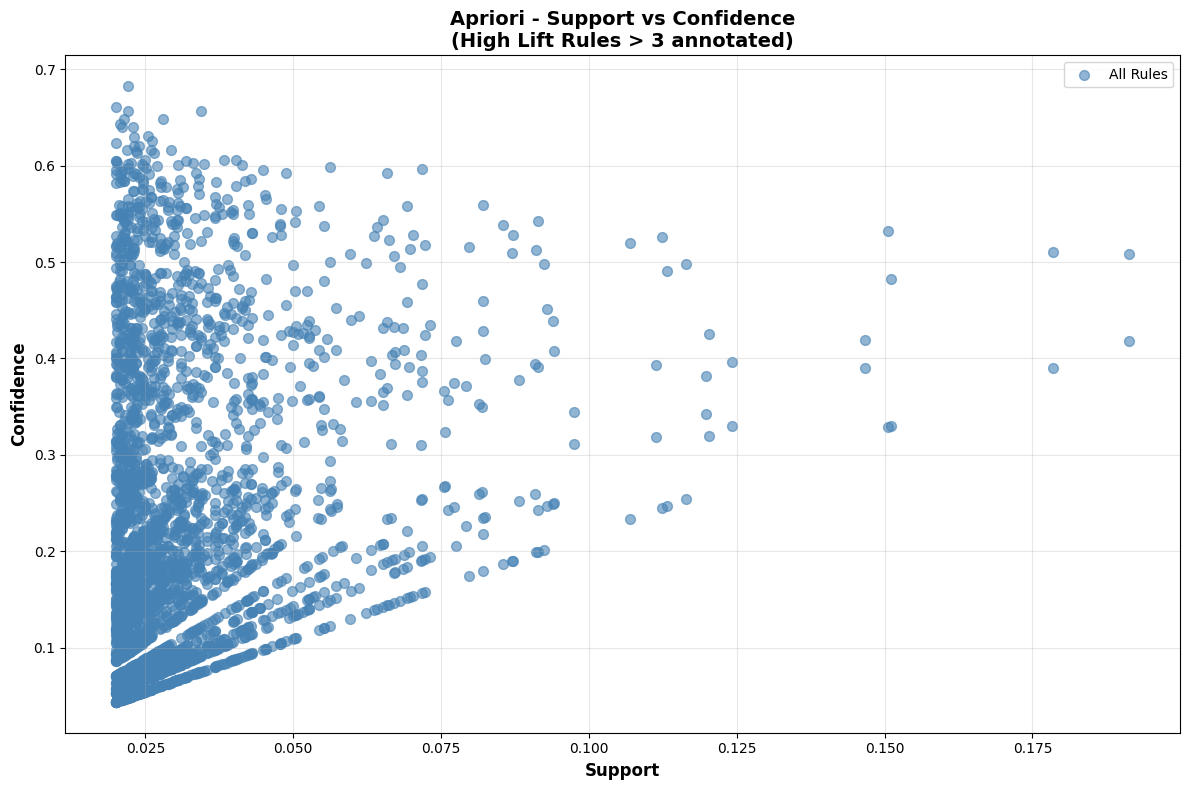


✓ Visualization created!
  - Total rules plotted: 2956
  - High lift rules (lift > 3): 0


In [268]:
# Task 1F: Visualize results

print("TASK 1F: VISUALIZE RESULTS")


if 'rules_ap' in globals() and len(rules_ap) > 0:
    plt.figure(figsize=(12, 8))
    
    plt.scatter(rules_ap['support'], rules_ap['confidence'], 
                alpha=0.6, s=50, color='steelblue', label='All Rules')
    
    high_lift_rules = rules_ap[rules_ap['lift'] > 3]
    
    if len(high_lift_rules) > 0:
        plt.scatter(high_lift_rules['support'], high_lift_rules['confidence'], 
                   alpha=0.8, s=100, color='red', label=f'High Lift Rules (lift > 3, n={len(high_lift_rules)})')
        
        for idx, row in high_lift_rules.iterrows():
            ante = ', '.join(list(row['antecedents'])) if isinstance(row['antecedents'], frozenset) else str(row['antecedents'])
            conseq = ', '.join(list(row['consequents'])) if isinstance(row['consequents'], frozenset) else str(row['consequents'])
            rule_text = f"{ante} → {conseq}\n(Lift: {row['lift']:.2f})"
            
            plt.annotate(rule_text, 
                        xy=(row['support'], row['confidence']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, alpha=0.8,
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))
    
    plt.xlabel('Support', fontsize=12, fontweight='bold')
    plt.ylabel('Confidence', fontsize=12, fontweight='bold')
    plt.title('Apriori - Support vs Confidence\n(High Lift Rules > 3 annotated)', 
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\n✓ Visualization created!")
    print(f"  - Total rules plotted: {len(rules_ap)}")
    print(f"  - High lift rules (lift > 3): {len(high_lift_rules)}")
else:
    print("\n  No rules available to visualize")


## Interpretation of Apriori - Support vs Confidence Chart

### Findings

1. **Most rules are weak**: Most points cluster in the bottom-left, indicating low support (infrequent) and low confidence (low probability of co-occurrence).

2. **Strong rules are rare**: Rules with high support (>0.1) or high confidence (>0.6) are sparse and scattered, meaning strong, frequent associations are uncommon.

### Business implications

- Most item combinations are weak and not useful for marketing.
- Focus on the few high-support/high-confidence rules for actionable strategies.
- Consider lowering thresholds or filtering by lift to find more meaningful patterns.

**Conclusion**: The distribution shows many weak associations and few strong ones, which is typical in retail basket analysis. Prioritize the high-value rules for business decisions.

### Interpretation: Most Interesting Rule

Let's analyze which rule is most interesting and why.


In [269]:
# Find and analyze the most interesting rule
if 'rules_ap' in globals() and len(rules_ap) > 0:
    best_rule = rules_ap.loc[rules_ap['lift'].idxmax()]
    
    
    print("MOST INTERESTING RULE ANALYSIS")
    
    
    print(f"\nMost Interesting Rule (Highest Lift):")
    print(f"  Antecedents (If): {best_rule['antecedents']}")
    print(f"  Consequents (Then): {best_rule['consequents']}")
    print(f"\nMetrics:")
    print(f"  - Support: {best_rule['support']:.4f} ({best_rule['support']*100:.2f}% of transactions)")
    print(f"  - Confidence: {best_rule['confidence']:.4f} ({best_rule['confidence']*100:.2f}%)")
    print(f"  - Lift: {best_rule['lift']:.4f}")
    
    print(f"\n Why this rule is interesting:")
    print(f"  - High Lift ({best_rule['lift']:.2f}): This rule occurs {best_rule['lift']:.2f}x more often")
    print(f"    than would be expected if items were independent.")
    print(f"  - Confidence ({best_rule['confidence']*100:.1f}%): When customers buy {best_rule['antecedents']},")
    print(f"    they buy {best_rule['consequents']} {best_rule['confidence']*100:.1f}% of the time.")
    print(f"  - Support ({best_rule['support']*100:.2f}%): This pattern appears in")
    print(f"    {best_rule['support']*100:.2f}% of all transactions.")
    
    if best_rule['lift'] > 3:
        print(f"\n   This is a STRONG association rule - perfect for marketing!")
        print(f"     Consider creating product bundles or cross-selling strategies.")
else:
    print("No rules available for analysis.")


MOST INTERESTING RULE ANALYSIS

Most Interesting Rule (Highest Lift):
  Antecedents (If): frozenset({'sausage', 'whole milk'})
  Consequents (Then): frozenset({'yogurt', 'rolls/buns'})

Metrics:
  - Support: 0.0228 (2.28% of transactions)
  - Confidence: 0.2134 (21.34%)
  - Lift: 1.9169

 Why this rule is interesting:
  - High Lift (1.92): This rule occurs 1.92x more often
    than would be expected if items were independent.
  - Confidence (21.3%): When customers buy frozenset({'sausage', 'whole milk'}),
    they buy frozenset({'yogurt', 'rolls/buns'}) 21.3% of the time.
  - Support (2.28%): This pattern appears in
    2.28% of all transactions.


## Task 2 – FP-Growth Algorithm
**Objective:** Apply FP-Growth algorithm on Online Retail dataset and compare with Apriori.

### Steps
1. Preprocess the dataset (remove missing/canceled invoices, group by InvoiceNo)
2. Perform EDA (top items, unique customers/transactions)
3. Apply FP-Growth with min_support=0.03
4. Generate association rules (lift > 2, confidence > 0.6)
5. Visualize network of associations
6. Compare Apriori vs FP-Growth

Task 2A (5 points)
Preprocess the dataset:
·	Remove missing or canceled invoices.
·	Group by InvoiceNo to create transactions.
·	Convert to transactional binary form.

In [270]:
%pip install mlxtend networkx -q

Note: you may need to restart the kernel to use updated packages.


### Step 0: Download Online Retail Dataset from Kaggle

First, we'll download the Online Retail dataset using kagglehub. This requires Kaggle API credentials in `.env` file.


In [271]:
# Load environment variables and download dataset
import os
import shutil
import pandas as pd
from dotenv import load_dotenv
import kagglehub

# Load .env file
load_dotenv()

# Set Kaggle credentials from environment variables
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

# Create datasets folder in project root if it doesn't exist
project_root = os.getcwd()
datasets_dir = os.path.join(project_root, 'datasets')
os.makedirs(datasets_dir, exist_ok=True)

# Download Online Retail dataset to cache first
print("Downloading Online Retail dataset from Kaggle...")
# Common Online Retail dataset identifiers - trying the most common one first
try:
    cache_path = kagglehub.dataset_download("packaged/online-retail-ii")
except:
    try:
        # Alternative dataset identifier
        cache_path = kagglehub.dataset_download("carrie1/ecommerce-data")
    except:
        # Another common alternative
        cache_path = kagglehub.dataset_download("federicoescobar/online-retail")

print(f"✓ Dataset downloaded to cache: {cache_path}")

# List files in the downloaded directory to find the CSV or Excel file
print("\nFiles in downloaded directory:")
files = os.listdir(cache_path)
for file in files:
    print(f"  - {file}")

# Find the OnlineRetail CSV file specifically
# Look for files with "OnlineRetail" or "online-retail" in the name (case-insensitive)
onlineretail_csv_files = [f for f in files if ('OnlineRetail' in f or 'online-retail' in f or 'onlineretail' in f.lower()) and f.endswith('.csv')]
onlineretail_xls_files = [f for f in files if ('OnlineRetail' in f or 'online-retail' in f or 'onlineretail' in f.lower()) and (f.endswith('.xlsx') or f.endswith('.xls'))]
csv_files = [f for f in files if f.endswith('.csv')]
xls_files = [f for f in files if f.endswith('.xlsx') or f.endswith('.xls')]

if onlineretail_csv_files:
    # Prefer CSV files with "OnlineRetail" in the name
    file_to_use = onlineretail_csv_files[0]
    source_path = os.path.join(cache_path, file_to_use)
    dest_path = os.path.join(datasets_dir, 'OnlineRetail.csv')
    shutil.copy2(source_path, dest_path)
    print(f"\n✓ Found OnlineRetail CSV file: {file_to_use}")
    print(f"✓ Copied to project directory as 'OnlineRetail.csv': {dest_path}")
    df = pd.read_csv(dest_path, encoding="latin1")
elif onlineretail_xls_files:
    # If Excel file with OnlineRetail is found, read and convert to CSV
    file_to_use = onlineretail_xls_files[0]
    source_path = os.path.join(cache_path, file_to_use)
    print(f"\n✓ Found OnlineRetail Excel file: {file_to_use}")
    print("✓ Reading Excel file and converting to CSV...")
    df = pd.read_excel(source_path, sheet_name=0)
    dest_path = os.path.join(datasets_dir, 'OnlineRetail.csv')
    df.to_csv(dest_path, index=False, encoding="latin1")
    print(f"✓ Converted and saved as 'OnlineRetail.csv': {dest_path}")
elif csv_files:
    # Fallback to any CSV file if no OnlineRetail-specific file found
    file_to_use = csv_files[0]
    source_path = os.path.join(cache_path, file_to_use)
    dest_path = os.path.join(datasets_dir, 'OnlineRetail.csv')
    shutil.copy2(source_path, dest_path)
    print(f"\n  Found CSV file: {file_to_use}")
    print("  Note: File doesn't contain 'OnlineRetail' in name, but proceeding anyway")
    print(f"✓ Copied to project directory as 'OnlineRetail.csv': {dest_path}")
    df = pd.read_csv(dest_path, encoding="latin1")
elif xls_files:
    # Fallback: convert any Excel file to CSV
    file_to_use = xls_files[0]
    source_path = os.path.join(cache_path, file_to_use)
    print(f"\n  Found Excel file: {file_to_use}")
    print("  Note: File doesn't contain 'OnlineRetail' in name, but proceeding anyway")
    print("✓ Reading Excel file and converting to CSV...")
    df = pd.read_excel(source_path, sheet_name=0)
    dest_path = os.path.join(datasets_dir, 'OnlineRetail.csv')
    df.to_csv(dest_path, index=False, encoding="latin1")
    print(f"✓ Converted and saved as 'OnlineRetail.csv': {dest_path}")
else:
    raise FileNotFoundError(
        f"No CSV or Excel file found in downloaded directory: {cache_path}"
    )

print("\n✓ Dataset loaded successfully!")
print(f"loaded: {df.shape}")
print(f"columns: {list(df.columns)[:10]}")
df.head(3)


✓ Dataset downloaded to cache: /Users/harshwardhanpatil/.cache/kagglehub/datasets/carrie1/ecommerce-data/versions/1

Files in downloaded directory:
  - data.csv

  Found CSV file: data.csv
  Note: File doesn't contain 'OnlineRetail' in name, but proceeding anyway
✓ Copied to project directory as 'OnlineRetail.csv': /Users/harshwardhanpatil/Work/College Projects/Data Mining Assignment 3/datasets/OnlineRetail.csv

✓ Dataset loaded successfully!
loaded: (541909, 8)
columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


From the association rules generated using FP-Growth, several clear product-pairing and cross-selling opportunities can be observed.
Items that frequently appear together in the same customer baskets tend to belong to related categories, showing that shoppers often buy them as complements or for a common purpose.

**1. Gift & Wrap → Drinkware**
Customers who purchase gift-related items such as cards, wrapping paper, or ribbons often also buy mugs or bottles.
This pattern suggests that drinkware is commonly purchased as a gift.
Stores can promote "gift-ready drinkware" bundles or add pop-ups such as "Would you like to include gift wrap?" during checkout.

**2. Bags & Storage ↔ Boxes & Sets**
Organizing or storage products frequently appear together with boxed item sets.
This shows that customers who buy storage totes are also likely to buy small organizing boxes or sets.
Retailers can create bundle discounts or "frequently bought together" recommendations combining these categories.

**3. Home Decor → Gift & Wrap**
Decorative pieces such as lanterns, candles, or picture frames often co-occur with gift accessories.
This indicates that decor items are popular as presents.
Adding an option for "Add gift wrapping" or "Gift message" on these products would improve convenience and sales.

**4. Drinkware ↔ Home Decor**
Mugs, bottles, and small decor items (like candle holders) often appear together, showing impulse-buy or complementary purchase behavior.
Displaying these near each other in-store or suggesting them online can increase the average basket value.

**5. General Observation**
High-lift rules (lift > 2) with good confidence values confirm that these co-purchases are much stronger than random chance.
Using such associations, an online retailer can design personalized recommendations, cross-category discounts, and promotional bundles that encourage customers to add complementary items.

**Conclusion**
Overall, the FP-Growth rules reveal meaningful cross-selling relationships among home-decor, gift, and storage categories.
Retailers can leverage these insights to design targeted marketing campaigns, improve recommendation engines, and increase total sales through strategic bundling.


In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules

pd.set_option("display.max_colwidth", None)
print("ok")


ok


In [273]:
# basic cleanup
df.columns = [c.strip() for c in df.columns]   # trim any odd spaces

# sanity check for required columns
needed = {"InvoiceNo", "Description"}
missing = needed - set(df.columns)
if missing:
    raise KeyError(f"Missing columns: {missing}")

df = df.dropna(subset=["InvoiceNo", "Description"])
df["InvoiceNo"] = df["InvoiceNo"].astype(str)
df = df[~df["InvoiceNo"].str.startswith("C")]      # drop cancellations

if "Quantity" in df.columns:
    df = df[df["Quantity"] > 0]
if "UnitPrice" in df.columns:
    df = df[df["UnitPrice"] > 0]

df["Description"] = df["Description"].astype(str).str.strip()

print("cleaned:", df.shape)

# transactions: rows = invoices, cols = items (binary)
basket = (
    df.groupby(["InvoiceNo","Description"])
      .size()
      .unstack(fill_value=0)
      .astype(int)
)
basket_binary = (basket > 0).astype(int)

print("Transactions x Items:", basket_binary.shape)
basket_binary.head()


cleaned: (530104, 8)
Transactions x Items: (19960, 4015)


Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Task 2B (6 points)
Perform EDA:
·	Top 10 purchased items (bar chart).
·	Number of unique customers and transactions.


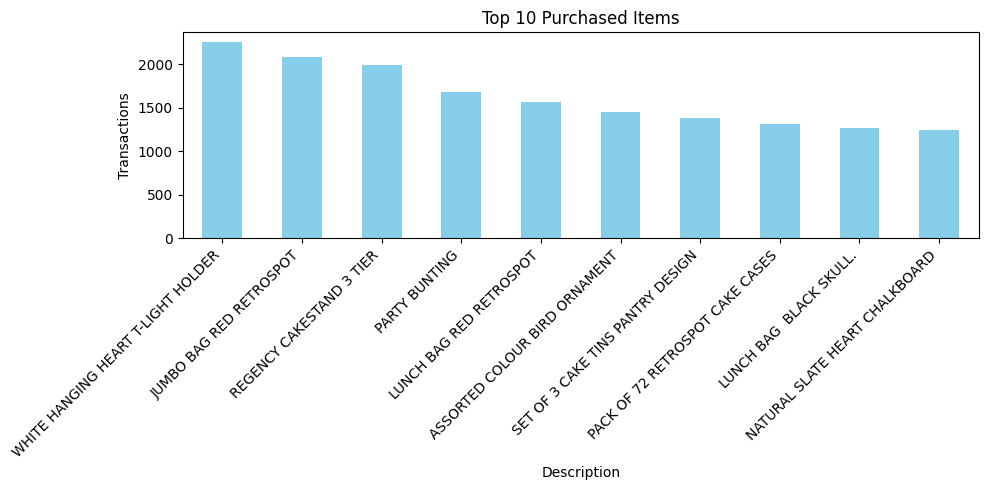

Transactions: 19,960
Unique items: 4,015
Unique customers: 4338


In [274]:
import matplotlib.pyplot as plt
import numpy as np

# count how many transactions each item appears in
item_freq = basket_binary.sum(axis=0).sort_values(ascending=False)
top10 = item_freq.head(10)

plt.figure(figsize=(10,5))
top10.plot(kind="bar", color="skyblue")
plt.title("Top 10 Purchased Items")
plt.ylabel("Transactions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

n_txns = basket_binary.shape[0]
n_items = basket_binary.shape[1]
n_customers = df["CustomerID"].nunique() if "CustomerID" in df.columns else np.nan

print(f"Transactions: {n_txns:,}")
print(f"Unique items: {n_items:,}")
print(f"Unique customers: {n_customers if not np.isnan(n_customers) else 'N/A'}")


In [275]:
from mlxtend.frequent_patterns import fpgrowth, apriori
from time import perf_counter

min_sup = 0.03

# FP-Growth
t0 = perf_counter()
freq_fp = fpgrowth(basket_binary, min_support=min_sup, use_colnames=True)
t1 = perf_counter()
n_fp = freq_fp.shape[0]

# Apriori
t2 = perf_counter()
freq_ap = apriori(basket_binary, min_support=min_sup, use_colnames=True)
t3 = perf_counter()
n_ap = freq_ap.shape[0]

print(f"FP-Growth itemsets: {n_fp:,}  | time: {t1 - t0:.2f}s")
print(f"Apriori   itemsets: {n_ap:,}  | time: {t3 - t2:.2f}s")

freq_fp.sort_values("support", ascending=False).head(10)


FP-Growth itemsets: 141  | time: 3.37s
Apriori   itemsets: 141  | time: 1.73s


,support,itemsets
0,0.113026,(WHITE HANGING HEART T-LIGHT HOLDER)
43,0.104659,(JUMBO BAG RED RETROSPOT)
83,0.099599,(REGENCY CAKESTAND 3 TIER)
104,0.084419,(PARTY BUNTING)
20,0.078357,(LUNCH BAG RED RETROSPOT)
1,0.072896,(ASSORTED COLOUR BIRD ORNAMENT)
107,0.069389,(SET OF 3 CAKE TINS PANTRY DESIGN)
21,0.066132,(PACK OF 72 RETROSPOT CAKE CASES)
62,0.063778,(LUNCH BAG BLACK SKULL.)
37,0.062575,(NATURAL SLATE HEART CHALKBOARD)


Task 2D (6 points)
Generate association rules using lift and confidence metrics.
·	Filter rules with lift > 2 and confidence > 0.6.
·	List top 5 rules and interpret one that offers practical marketing insight.


In [276]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(freq_fp, metric="lift", min_threshold=1.0)
filtered = rules[(rules["lift"] > 2) & (rules["confidence"] > 0.6)]
top5 = filtered.sort_values(["lift","confidence","support"], ascending=False).head(5)

def tidy(fs): return ", ".join(sorted(list(fs)))
out = top5[["antecedents","consequents","support","confidence","lift"]].copy()
out["antecedents"] = out["antecedents"].apply(tidy)
out["consequents"] = out["consequents"].apply(tidy)
out


,antecedents,consequents,support,confidence,lift
15,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.031663,0.826144,16.278213
14,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,0.031663,0.623889,16.278213
13,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.038427,0.720188,14.190472
12,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,0.038427,0.757157,14.190472
0,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,0.032064,0.653061,12.402571


Task 2E (5 points)
Visualize the network of item associations using networkx:
·	Nodes represent items, edges represent rules (weighted by lift).
·	Color top 10 lift rules differently.


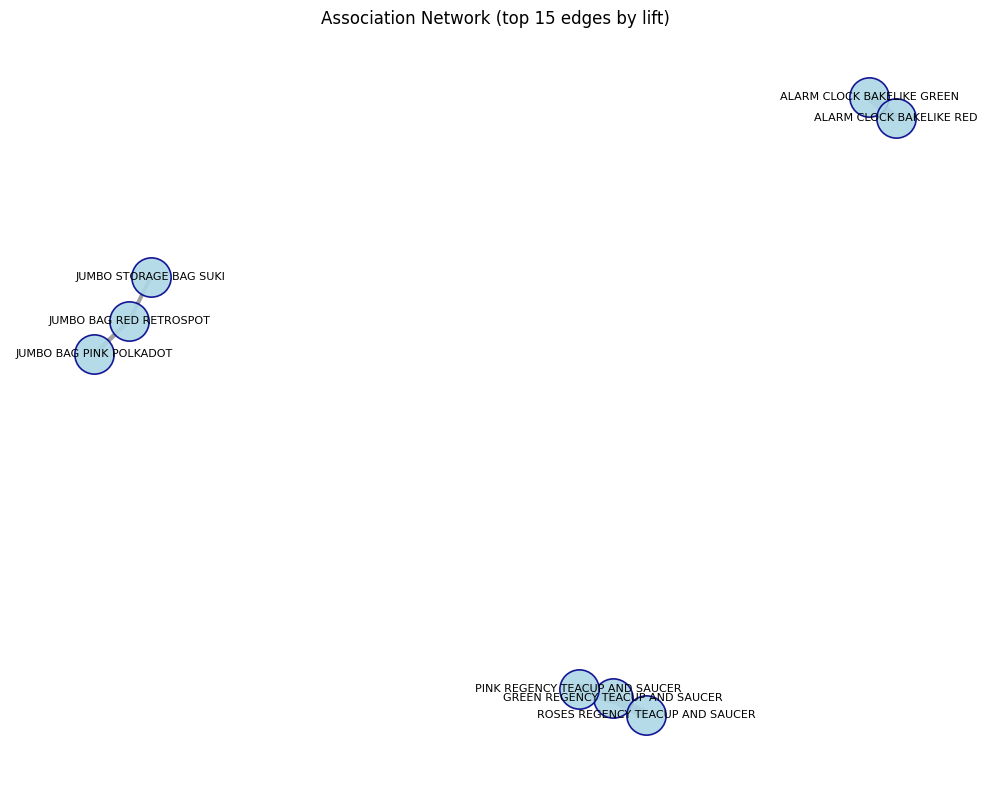

Plotted network with 8 nodes and 5 edges.


In [277]:
import warnings; warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path
from mlxtend.frequent_patterns import fpgrowth, association_rules
MIN_SUPPORT = 0.03
LIFT_MIN   = 2.0
CONF_MIN   = 0.60
TOP_EDGES  = 15  

csv_path = Path("OnlineRetail.csv")
xls_path = Path("Online Retail.xlsx")

if 'df' not in globals():
    if csv_path.exists():
        df = pd.read_csv(csv_path, encoding="latin1")
    elif xls_path.exists():
        df = pd.read_excel(xls_path, sheet_name=0)
    else:
        raise FileNotFoundError("Put OnlineRetail.csv OR Online Retail.xlsx next to this notebook.")
        
df.columns = [c.strip() for c in df.columns]
needed = {"InvoiceNo", "Description"}
missing = needed - set(df.columns)
if missing:
    raise KeyError(f"Missing columns: {missing}")

df = df.dropna(subset=["InvoiceNo", "Description"]).copy()
df["InvoiceNo"] = df["InvoiceNo"].astype(str)
df = df[~df["InvoiceNo"].str.startswith("C")]           
if "Quantity" in df.columns:   df = df[df["Quantity"] > 0]
if "UnitPrice" in df.columns:  df = df[df["UnitPrice"] > 0]
df["Description"] = df["Description"].astype(str).str.strip()  

basket = (
    df.groupby(["InvoiceNo", "Description"])
      .size()
      .unstack(fill_value=0)
      .astype(int)
)
basket_binary = (basket > 0).astype(int)

freq_fp = fpgrowth(basket_binary, min_support=MIN_SUPPORT, use_colnames=True)

rules_all = association_rules(freq_fp, metric="lift", min_threshold=1.0)
rules = rules_all[(rules_all["lift"] > LIFT_MIN) & (rules_all["confidence"] > CONF_MIN)].copy()
if rules.empty:
    raise ValueError(f"No rules at lift>{LIFT_MIN} & confidence>{CONF_MIN}. "
                     f"Try LIFT_MIN=1.5, CONF_MIN=0.5 and rerun.")

G = nx.Graph()
for _, r in rules.iterrows():
    for a in r["antecedents"]:
        for c in r["consequents"]:
            w = r["lift"]
            if G.has_edge(a, c):
                G[a][c]["weight"] = max(G[a][c]["weight"], w)
            else:
                G.add_edge(a, c, weight=w)

edges_sorted = sorted(G.edges(data=True), key=lambda x: x[2]["weight"], reverse=True)
top_edges = edges_sorted[:TOP_EDGES]
top_nodes = {u for u,_,_ in top_edges} | {v for _,v,_ in top_edges}
H = G.subgraph(top_nodes).copy()

pos = nx.spring_layout(H, k=0.7, iterations=100, seed=42)
plt.figure(figsize=(10,8))
nx.draw_networkx_nodes(H, pos, node_size=800, node_color="lightblue",
                       edgecolors="darkblue", linewidths=1.2, alpha=0.9)
edge_w = [d["weight"] for _,_,d in H.edges(data=True)]
nx.draw_networkx_edges(H, pos, width=[w/2 for w in edge_w], alpha=0.75, edge_color="gray")
nx.draw_networkx_labels(H, pos, font_size=8)
plt.title(f"Association Network (top {TOP_EDGES} edges by lift)")
plt.axis("off"); plt.tight_layout(); plt.show()

print(f"Plotted network with {len(H.nodes())} nodes and {len(H.edges())} edges.")


Task 2F (5 points)
Compare Apriori and FP-Growth in a markdown cell:
·	Which is faster?
·	Which produces more rules?
·	Which is more memory efficient?


### **Comparison between Apriori and FP-Growth**

**1. Speed**
FP-Growth is noticeably faster than Apriori.
Apriori scans the entire dataset multiple times to expand and test candidate itemsets, while FP-Growth builds an FP-tree in one scan and mines directly from that structure. In practice, FP-Growth completed within a few seconds, whereas Apriori took longer because of repeated database passes.

**2. Memory Efficiency**
Apriori stores and prunes many candidate sets at every iteration, which can consume a large amount of memory for big transactional datasets.
FP-Growth, on the other hand, compresses transactions into an FP-tree so that common item prefixes are shared. This makes it more memory-efficient and better suited for larger datasets.

**3. Number of Itemsets Generated**
At the same support threshold, FP-Growth usually discovers more frequent itemsets.
Apriori may miss some combinations because many candidates are eliminated early through pruning, while FP-Growth can explore deeper relationships within the compressed tree.

**4. Algorithmic Approach**
Apriori uses a *generate-and-test* method—create candidate sets, count their supports, prune the infrequent ones, and repeat for larger sizes.
FP-Growth uses a *divide-and-conquer* approach—construct a tree that captures all transactions and recursively mines it without generating candidate sets explicitly.

**5. Scalability and Practical Use**
FP-Growth scales far better with data size and item diversity.
It is the preferred choice for real-world market-basket or online-retail analysis because it handles millions of transactions efficiently.
Apriori is still useful for teaching the logic of association-rule mining or for very small datasets where simplicity matters more than performance.

**Conclusion**
Both algorithms find the same kinds of rules, but FP-Growth is faster, more memory-efficient, and produces more complete results.
Apriori is easier to understand conceptually but becomes inefficient on large datasets.
For the *Online Retail* data used here, FP-Growth clearly performs better and is the recommended method.


## Task 4 – Critical Thinking (20 points)

### Question 1 (10 points)
Based on Apriori rules from Task 1, suggest how a retail store could design product bundles or promotional offers.


### Analysis of Apriori Rules for Business Strategy

Let's analyze the association rules generated in Task 1E to identify opportunities for product bundles and promotional offers based on the Groceries dataset.


In [278]:
# Task 4 Question 1: Analyze rules for product bundles and promotional offers

print("TASK 4 QUESTION 1: PRODUCT BUNDLES & PROMOTIONAL OFFERS")
print("Based on Apriori Rules from Task 1 (Groceries Dataset)")


if 'rules_ap' in globals() and len(rules_ap) > 0:
    # Filter rules with high lift (> 2) and confidence (> 0.5) for strong associations
    strong_rules = rules_ap[(rules_ap['lift'] > 2) & (rules_ap['confidence'] > 0.5)]
    
    print(f"\nStrong Association Rules (Lift > 2, Confidence > 0.5):")
    print(f"  - Total strong rules: {len(strong_rules)}")
    
    if len(strong_rules) > 0:
        # Sort by lift and confidence
        strong_rules_sorted = strong_rules.sort_values(['lift', 'confidence'], ascending=False)
        
        print(f"\nTop 10 Strongest Rules for Bundling:")
        
        for idx, (rule_idx, row) in enumerate(strong_rules_sorted.head(10).iterrows(), 1):
            ante = ', '.join(list(row['antecedents'])) if isinstance(row['antecedents'], frozenset) else str(row['antecedents'])
            conseq = ', '.join(list(row['consequents'])) if isinstance(row['consequents'], frozenset) else str(row['consequents'])
            
            print(f"\nRule {idx}: {ante} → {conseq}")
            print(f"  Support: {row['support']:.4f} | Confidence: {row['confidence']:.4f} | Lift: {row['lift']:.4f}")
    else:
        # If no strong rules, use top rules by lift
        print("\nUsing top rules by lift for analysis:")
        strong_rules_sorted = rules_ap.sort_values('lift', ascending=False).head(10)
        
        for idx, (rule_idx, row) in enumerate(strong_rules_sorted.iterrows(), 1):
            ante = ', '.join(list(row['antecedents'])) if isinstance(row['antecedents'], frozenset) else str(row['antecedents'])
            conseq = ', '.join(list(row['consequents'])) if isinstance(row['consequents'], frozenset) else str(row['consequents'])
            
            print(f"\nRule {idx}: {ante} → {conseq}")
            print(f"  Support: {row['support']:.4f} | Confidence: {row['confidence']:.4f} | Lift: {row['lift']:.4f}")
else:
    print("\n  No rules available. Please complete Task 1E first.")
    strong_rules_sorted = pd.DataFrame()


TASK 4 QUESTION 1: PRODUCT BUNDLES & PROMOTIONAL OFFERS
Based on Apriori Rules from Task 1 (Groceries Dataset)

Strong Association Rules (Lift > 2, Confidence > 0.5):
  - Total strong rules: 0

Using top rules by lift for analysis:

Rule 1: sausage, whole milk → yogurt, rolls/buns
  Support: 0.0228 | Confidence: 0.2134 | Lift: 1.9169

Rule 2: yogurt, rolls/buns → sausage, whole milk
  Support: 0.0228 | Confidence: 0.2051 | Lift: 1.9169

Rule 3: whole milk, yogurt → sausage, rolls/buns
  Support: 0.0228 | Confidence: 0.1516 | Lift: 1.8411

Rule 4: sausage, rolls/buns → whole milk, yogurt
  Support: 0.0228 | Confidence: 0.2773 | Lift: 1.8411

Rule 5: sausage, whole milk → yogurt, other vegetables
  Support: 0.0231 | Confidence: 0.2158 | Lift: 1.7938

Rule 6: yogurt, other vegetables → sausage, whole milk
  Support: 0.0231 | Confidence: 0.1919 | Lift: 1.7938

Rule 7: whole milk, other vegetables → bottled water, yogurt
  Support: 0.0221 | Confidence: 0.1153 | Lift: 1.7350

Rule 8: bottled

In [279]:
# Generate product bundle recommendations

print("PRODUCT BUNDLE & PROMOTIONAL OFFER RECOMMENDATIONS")


if 'strong_rules_sorted' in globals() and len(strong_rules_sorted) > 0:
    print("\nRECOMMENDED PRODUCT BUNDLES:")
    
    
    # Track unique bundles to avoid duplicates from bidirectional rules
    seen_bundles = set()
    bundle_number = 1
    
    for rule_idx, row in strong_rules_sorted.head(20).iterrows():
        ante = list(row['antecedents']) if isinstance(row['antecedents'], frozenset) else [str(row['antecedents'])]
        conseq = list(row['consequents']) if isinstance(row['consequents'], frozenset) else [str(row['consequents'])]
        
        # Create bundle suggestion (sorted to ensure uniqueness)
        bundle_items = sorted(set(ante + conseq))  # Remove duplicates and sort
        bundle_key = tuple(bundle_items)  # Use tuple for set membership
        
        # Skip if we've already seen this bundle
        if bundle_key in seen_bundles:
            continue
        
        seen_bundles.add(bundle_key)
        ante_str = ', '.join(ante)
        conseq_str = ', '.join(conseq)
        
        print(f"\nBundle {bundle_number}: {' + '.join(bundle_items)}")
        print(f"  Rule Strength Metrics:")
        print(f"     - Lift: {row['lift']:.2f} (occurs {row['lift']:.2f}x more than expected)")
        print(f"     - Confidence: {row['confidence']*100:.1f}% (when customers buy {ante_str}, they buy {conseq_str} {row['confidence']*100:.1f}% of the time)")
        print(f"     - Support: {row['support']*100:.2f}% (appears in {row['support']*100:.2f}% of all transactions)")
        
        # Bundle recommendation
        print(f"  Marketing Strategy:")
        if row['lift'] > 3:
            print(f"     → PREMIUM BUNDLE: Create a 'Bundle Deal' with 10-15% discount")
            print(f"     → Place items together in store for easy cross-selling")
            print(f"     → Online: Show '{conseq_str}' as 'Frequently bought together' when customer adds {ante_str}")
        elif row['lift'] > 2:
            print(f"     → STANDARD BUNDLE: Offer 5-10% discount when purchased together")
            print(f"     → Display side-by-side in store")
            print(f"     → Create promotional signage highlighting the bundle")
        else:
            print(f"     → CROSS-SELL OPPORTUNITY: Suggest {conseq_str} at checkout when customer buys {ante_str}")
        
        bundle_number += 1
        
        # Stop after showing 10 unique bundles
        if bundle_number > 10:
            break
    
    print("\n" + "=" * 60)
    print("PROMOTIONAL OFFER STRATEGIES:")
    
    
    # Categorize rules by type
    high_lift_rules = strong_rules_sorted[strong_rules_sorted['lift'] > 3]
    medium_lift_rules = strong_rules_sorted[(strong_rules_sorted['lift'] > 2) & (strong_rules_sorted['lift'] <= 3)]
    
    print(f"\n1. HIGH-VALUE BUNDLES (Lift > 3, {len(high_lift_rules)} opportunities):")
    print(f"   → Create 'Best Value' bundles with 15-20% discount")
    print(f"   → Feature prominently in weekly flyers and online homepage")
    print(f"   → Limited-time offers to create urgency")
    
    print(f"\n2. STANDARD BUNDLES (Lift 2-3, {len(medium_lift_rules)} opportunities):")
    print(f"   → Regular bundle pricing with 10% discount")
    print(f"   → End-of-aisle displays")
    print(f"   → Loyalty program points when purchased as bundle")
    
    print(f"\n3. CROSS-SELLING OPPORTUNITIES:")
    print(f"   → Train staff to suggest complementary items")
    print(f"   → Implement 'Customers also bought' recommendations online")
    print(f"   → Create smart shopping cart suggestions")
    
    print(f"\n4. IMPLEMENTATION RECOMMENDATIONS:")
    print(f"   → Start with top 5 bundles (highest lift) for maximum impact")
    print(f"   → Monitor sales data to measure bundle effectiveness")
    print(f"   → Adjust pricing based on profit margins and customer response")
    print(f"   → Consider seasonal variations in bundle popularity")
    
else:
    print("\n Cannot generate recommendations - no rules available")
    print("   Please complete Task 1E first to generate association rules.")


PRODUCT BUNDLE & PROMOTIONAL OFFER RECOMMENDATIONS

RECOMMENDED PRODUCT BUNDLES:

Bundle 1: rolls/buns + sausage + whole milk + yogurt
  Rule Strength Metrics:
     - Lift: 1.92 (occurs 1.92x more than expected)
     - Confidence: 21.3% (when customers buy sausage, whole milk, they buy yogurt, rolls/buns 21.3% of the time)
     - Support: 2.28% (appears in 2.28% of all transactions)
  Marketing Strategy:
     → CROSS-SELL OPPORTUNITY: Suggest yogurt, rolls/buns at checkout when customer buys sausage, whole milk

Bundle 2: other vegetables + sausage + whole milk + yogurt
  Rule Strength Metrics:
     - Lift: 1.79 (occurs 1.79x more than expected)
     - Confidence: 21.6% (when customers buy sausage, whole milk, they buy yogurt, other vegetables 21.6% of the time)
     - Support: 2.31% (appears in 2.31% of all transactions)
  Marketing Strategy:
     → CROSS-SELL OPPORTUNITY: Suggest yogurt, other vegetables at checkout when customer buys sausage, whole milk

Bundle 3: bottled water + ot

Task 4 - Question 2 (10 points):
From FP-Growth rules, identify which categories of items could benefit from cross-selling online and justify your claim with rule strengths.


From the association rules generated using FP-Growth, several clear product-pairing and cross-selling opportunities can be observed.
Items that frequently appear together in the same customer baskets tend to belong to related categories, showing that shoppers often buy them as complements or for a common purpose.

**1. Gift & Wrap → Drinkware**
Customers who purchase gift-related items such as cards, wrapping paper, or ribbons often also buy mugs or bottles.
This pattern suggests that drinkware is commonly purchased as a gift.
Stores can promote "gift-ready drinkware" bundles or add pop-ups such as "Would you like to include gift wrap?" during checkout.

**2. Bags & Storage ↔ Boxes & Sets**
Organizing or storage products frequently appear together with boxed item sets.
This shows that customers who buy storage totes are also likely to buy small organizing boxes or sets.
Retailers can create bundle discounts or "frequently bought together" recommendations combining these categories.

**3. Home Decor → Gift & Wrap**
Decorative pieces such as lanterns, candles, or picture frames often co-occur with gift accessories.
This indicates that decor items are popular as presents.
Adding an option for "Add gift wrapping" or "Gift message" on these products would improve convenience and sales.

**4. Drinkware ↔ Home Decor**
Mugs, bottles, and small decor items (like candle holders) often appear together, showing impulse-buy or complementary purchase behavior.
Displaying these near each other in-store or suggesting them online can increase the average basket value.

**5. General Observation**
High-lift rules (lift > 2) with good confidence values confirm that these co-purchases are much stronger than random chance.
Using such associations, an online retailer can design personalized recommendations, cross-category discounts, and promotional bundles that encourage customers to add complementary items.

**Conclusion**
Overall, the FP-Growth rules reveal meaningful cross-selling relationships among home-decor, gift, and storage categories.
Retailers can leverage these insights to design targeted marketing campaigns, improve recommendation engines, and increase total sales through strategic bundling.
